In [1]:
#Example 7.5 YOLOv3 Detection
import numpy as np
import cv2 as cv
import os
from yolo_utils import infer_image
from types import SimpleNamespace
from IPython.display import Image, display

In [2]:
 
d = {'confidence':0.5,'threshold':0.3,
     'weights':'./yolov3.weights',
     'config':'./yolov3.cfg',
     'show_time':False}
FLAGS = SimpleNamespace(**d)
cocolabels='./coco-labels.txt'
labels = open(cocolabels).read().strip().split('\n')
print(FLAGS)
print()
print(labels)

namespace(confidence=0.5, threshold=0.3, weights='./yolov3.weights', config='./yolov3.cfg', show_time=False)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
net = cv.dnn.readNetFromDarknet(FLAGS.config, FLAGS.weights)

layer_names = net.getLayerNames()
layer_names = [layer_names[(i - 1)] for i in net.getUnconnectedOutLayers()]
print(layer_names)      


['yolo_82', 'yolo_94', 'yolo_106']


In [4]:
imgs = []

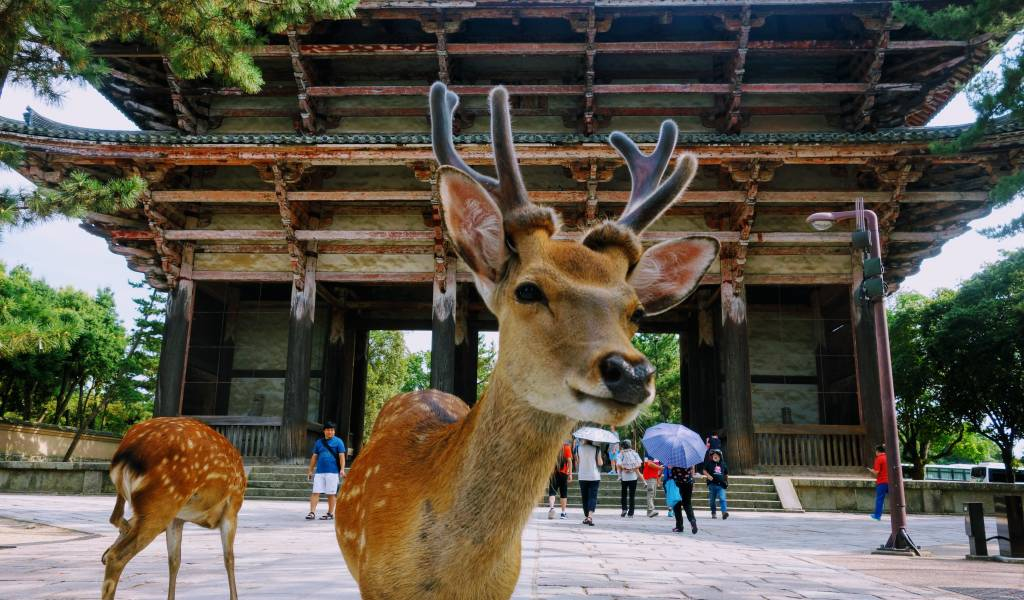

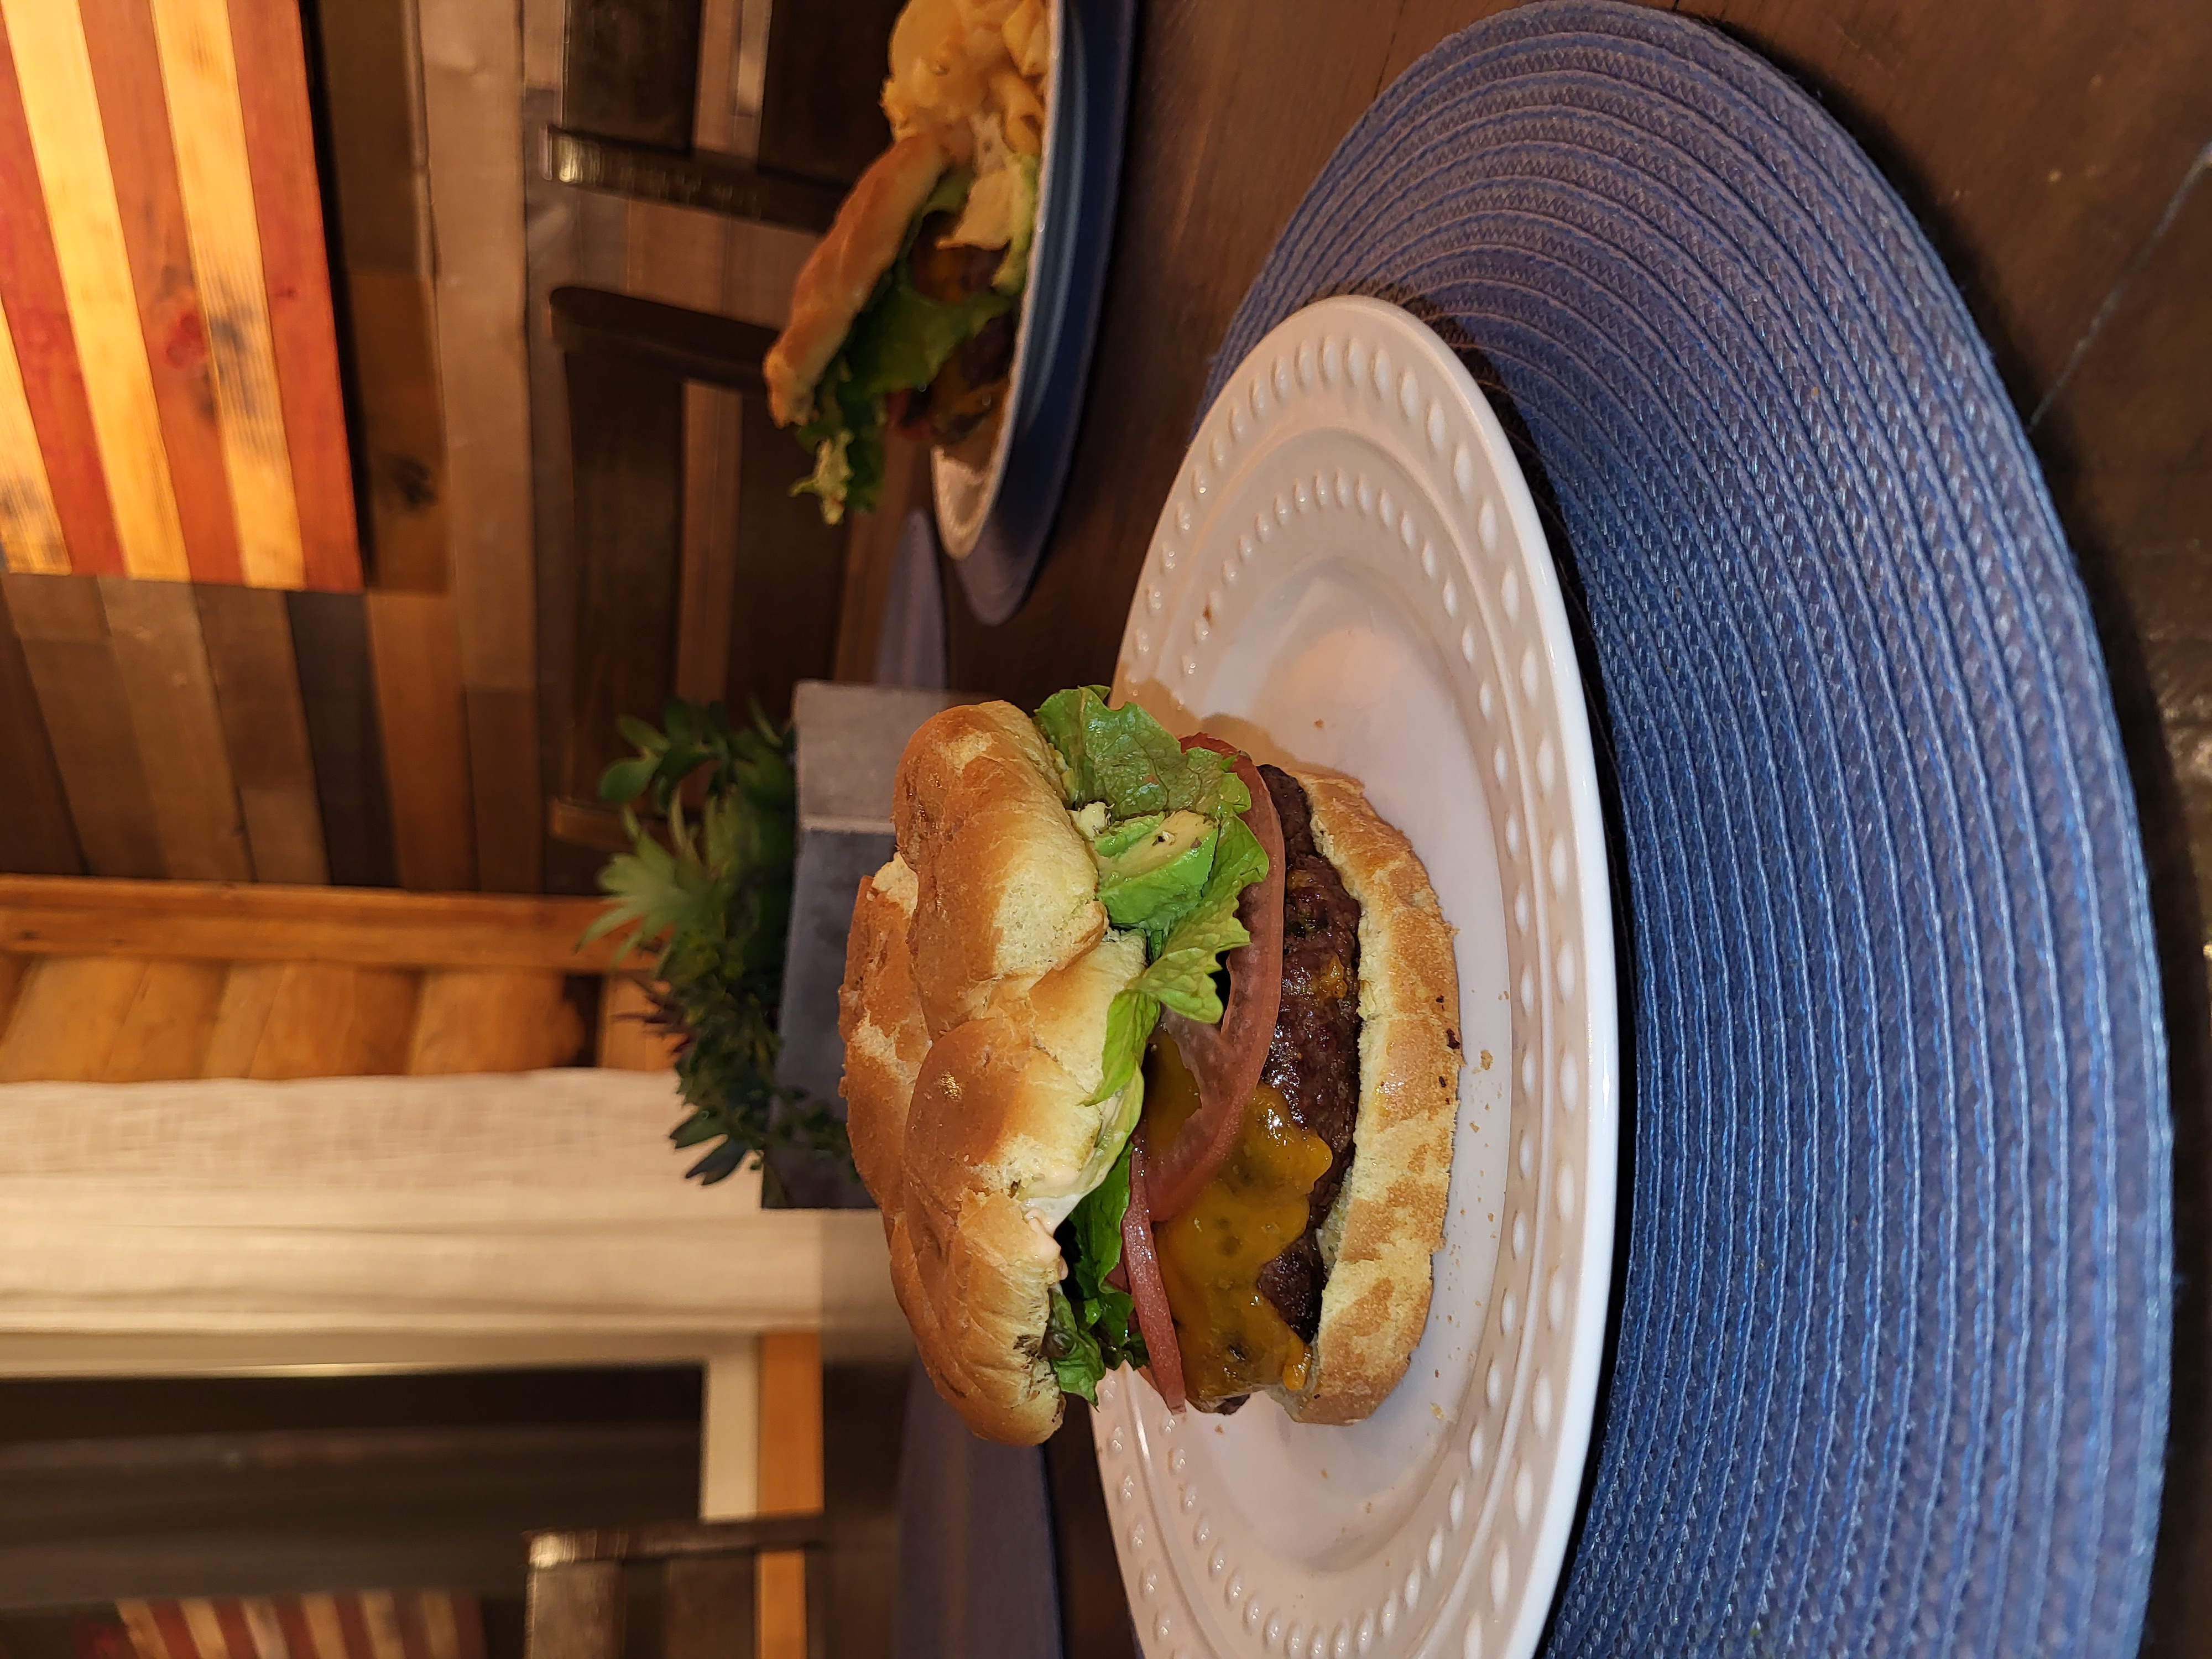

In [5]:
img_n = cv.imread('NaraJpn.jpg')
display(Image('NaraJpn.jpg'))

img_s = cv.imread('S.jpg')
display(Image('S.jpg'))

In [6]:
# img = cv.resize(img, (1300,1000), interpolation = cv.INTER_AREA)
# height, width = img.shape[:2]
# img, boxes, confidences, classids, idxs = infer_image(net, layer_names, \
#               height, width, img, colors, labels, FLAGS)
# cv.imshow('image', img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [7]:
# Resize images to the same size
size = (1300, 1000)

img_n = cv.resize(img_n, size, interpolation=cv.INTER_AREA)
img_s = cv.resize(img_s, size, interpolation=cv.INTER_AREA)

In [8]:

height, width = img_n.shape[:2]
height, width = img_s.shape[:2]

In [9]:
img_n, boxes, confidences, classids, idxs = infer_image(net, layer_names, \
              height, width, img_n, colors, labels, FLAGS)


In [10]:
print("Detections in img_n:")
for i in idxs:
    print(labels[classids[i]], confidences[i])


Detections in img_n:
person 0.9923583269119263
person 0.9892793893814087
person 0.968355655670166
giraffe 0.9349092245101929
umbrella 0.9090812802314758
person 0.8727948069572449
person 0.8522663712501526
person 0.8120521903038025
horse 0.7637996673583984
person 0.6368464231491089
person 0.508319079875946


In [11]:
img_s, boxes, confidences, classids, idxs = infer_image(net, layer_names, \
              height, width, img_s, colors, labels, FLAGS)

In [12]:
print("Detections in img_s:")
for i in idxs:
    print(labels[classids[i]], confidences[i])

Detections in img_s:
sandwich 0.9974197149276733
pottedplant 0.9444369673728943
chair 0.8133441805839539
diningtable 0.7717769742012024
chair 0.686836838722229
sandwich 0.684442400932312


In [ ]:
cv.imshow('image', img_n)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('image', img_s)
cv.waitKey(0)
cv.destroyAllWindows()

Run an object detection analysis on these two images and provide your interpretation of the results in a markdown cell.  How effective was the pretrained model on identifying objects in the image? Were any of the objects that you expected to be identified missed by the algorithm?  Were there any objects that were misidentified?

The pretrained model did pretty well considering the images that I used. I used one from the interenet and another from my personal pictures. I was suprised in the first picture that the dder in Nara were guessed as giraffe at 93%, although I chose a close up picture to try and see if maybe the horns would give it away, but it guess incorrect along with his companion on the left, however, instead of a giraffe the model thinks it's a "horse". It was abelt to find the people realitvely easy, and I didn't expect the "umbrella" to be guessed. 

In the second picture most everythign was found that I expected it to, I didn't expect the chairs to be indentified just by the up areas, but nonetheless it found both chairs in the picture. The first picture gave the most interesting results, with the variety of objects. 
